In [1]:
# import required libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn import metrics

In [2]:
# load the dataset
df = pd.read_csv(r'G:\Healthcare\Healthcare-Diabetes.csv')

In [3]:
# shape of the dataset
df.shape

(2768, 10)

In [4]:
# show all the columns in the dataset
df.columns

Index(['Id', 'Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness',
       'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

In [5]:
# show the first five rows
df.head()

,Id,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,1,6,148,72,35,0,33.6,0.627,50,1
1,2,1,85,66,29,0,26.6,0.351,31,0
2,3,8,183,64,0,0,23.3,0.672,32,1
3,4,1,89,66,23,94,28.1,0.167,21,0
4,5,0,137,40,35,168,43.1,2.288,33,1


In [6]:
# show the information of all the columns
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2768 entries, 0 to 2767
Data columns (total 10 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Id                        2768 non-null   int64  
 1   Pregnancies               2768 non-null   int64  
 2   Glucose                   2768 non-null   int64  
 3   BloodPressure             2768 non-null   int64  
 4   SkinThickness             2768 non-null   int64  
 5   Insulin                   2768 non-null   int64  
 6   BMI                       2768 non-null   float64
 7   DiabetesPedigreeFunction  2768 non-null   float64
 8   Age                       2768 non-null   int64  
 9   Outcome                   2768 non-null   int64  
dtypes: float64(2), int64(8)
memory usage: 216.4 KB


## Observations on dataset:
* The given dataset contains 2768 rows and 10 columns.
* The Names of the columns are appropriate.
* The datatypes of the columns are appropriate.
* There are no null values in the dataset.

In [7]:
# drop the id column
df = df.drop(columns = ['Id'])

In [8]:
# statistical analysis of columns
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,2768.000000,2768.000000,2768.000000,2768.000000,2768.000000,2768.000000,2768.000000,2768.000000,2768.000000
mean,3.742775,121.102601,69.134393,20.824422,80.127890,32.137392,0.471193,33.132225,0.343931
std,3.323801,32.036508,19.231438,16.059596,112.301933,8.076127,0.325669,11.777230,0.475104
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.244000,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,37.000000,32.200000,0.375000,29.000000,0.000000
75%,6.000000,141.000000,80.000000,32.000000,130.000000,36.625000,0.624000,40.000000,1.000000
max,17.000000,199.000000,122.000000,110.000000,846.000000,80.600000,2.420000,81.000000,1.000000


The minimum value in Glucose,BloodPressure,SkinThickness,Insulin,BMI is 0 which is not possible according to the domain knowledge. Hence replace the 0 values in the respective columns with their median.

In [9]:
# replace the 0 values with median
columns = ['Glucose','BloodPressure','SkinThickness','Insulin','BMI']
for col in columns:
    df[col] = df[col].replace(0,df[col].median())

In [10]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,2768.000000,2768.000000,2768.000000,2768.000000,2768.000000,2768.000000,2768.000000,2768.000000,2768.000000
mean,3.742775,121.863439,72.385838,27.471821,97.906069,32.591077,0.471193,33.132225,0.343931
std,3.323801,30.503499,11.988549,9.470778,100.516123,7.103578,0.325669,11.777230,0.475104
min,0.000000,44.000000,24.000000,7.000000,14.000000,18.200000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,64.000000,23.000000,37.000000,27.575000,0.244000,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,37.000000,32.200000,0.375000,29.000000,0.000000
75%,6.000000,141.000000,80.000000,32.000000,130.000000,36.625000,0.624000,40.000000,1.000000
max,17.000000,199.000000,122.000000,110.000000,846.000000,80.600000,2.420000,81.000000,1.000000


## Data Analysis

<Axes: xlabel='Outcome', ylabel='count'>

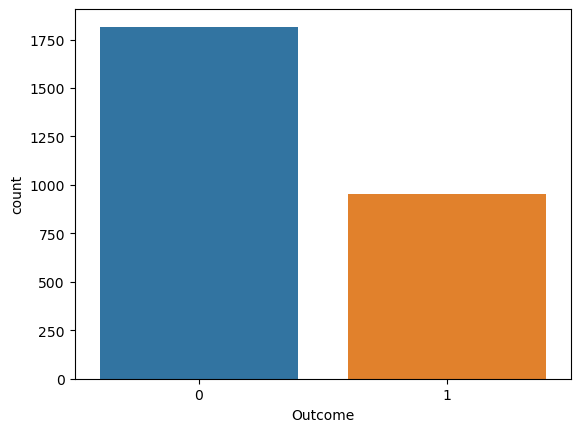

In [11]:
# countplot for the Outcome
sns.countplot(df,x = 'Outcome')

The majority of the patients have an outcome of '0,' indicating that they don't have diabetes. Patients with an outcome of '1' are identified as having diabetes.

<Axes: xlabel='Pregnancies', ylabel='count'>

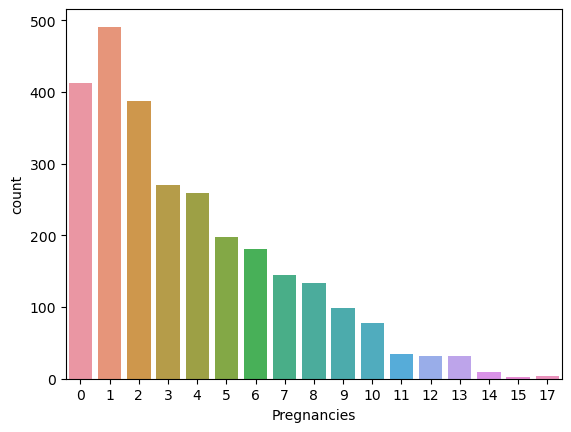

In [12]:
# countplot for Pregnancies
sns.countplot(df,x = 'Pregnancies')

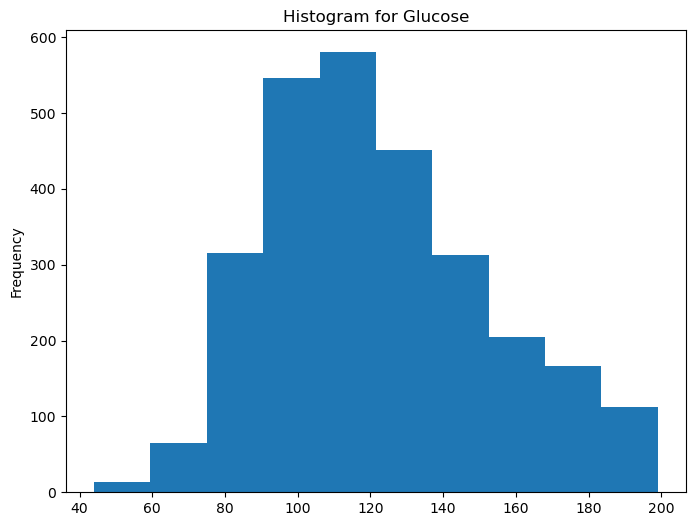

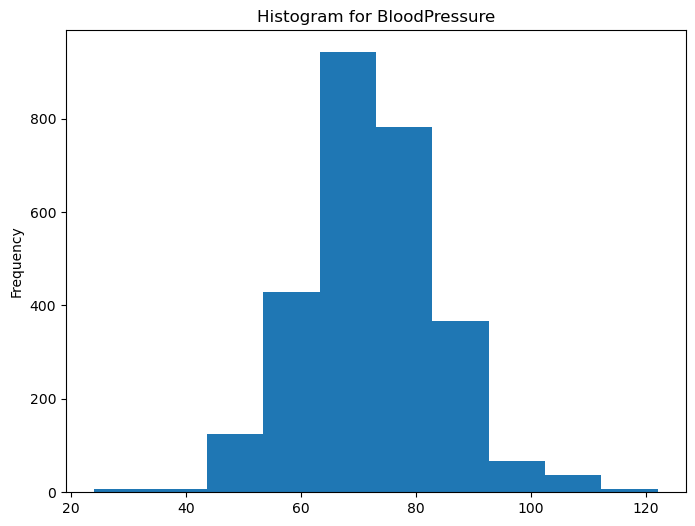

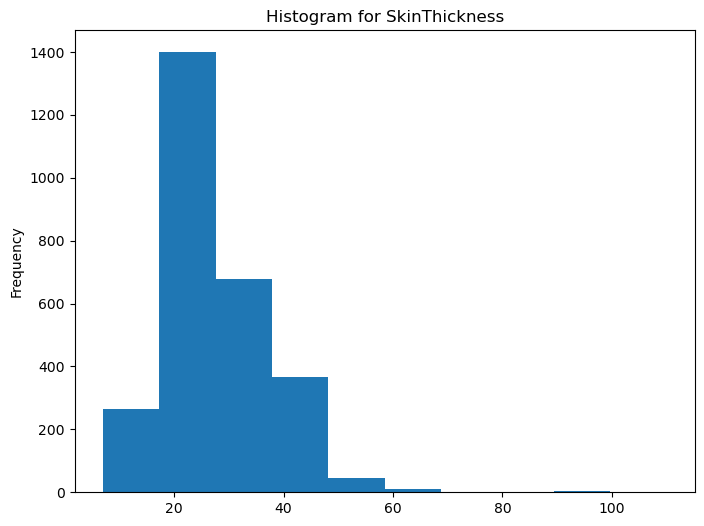

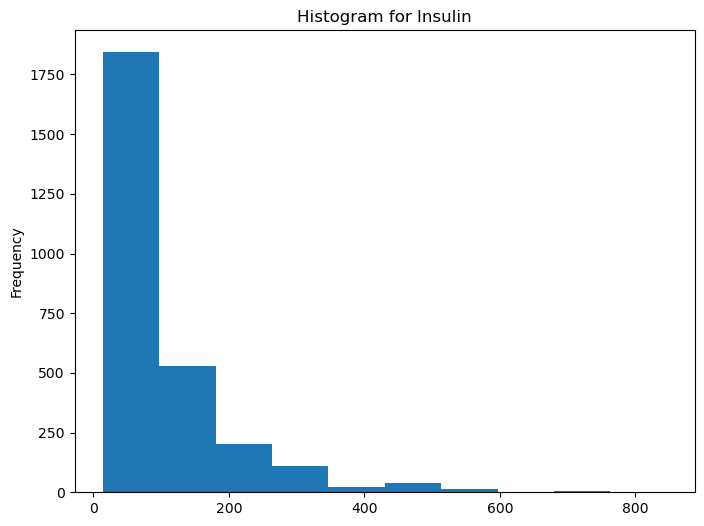

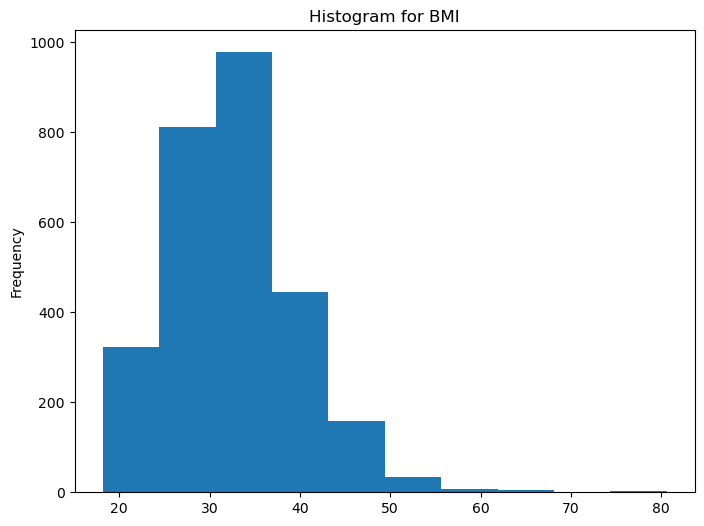

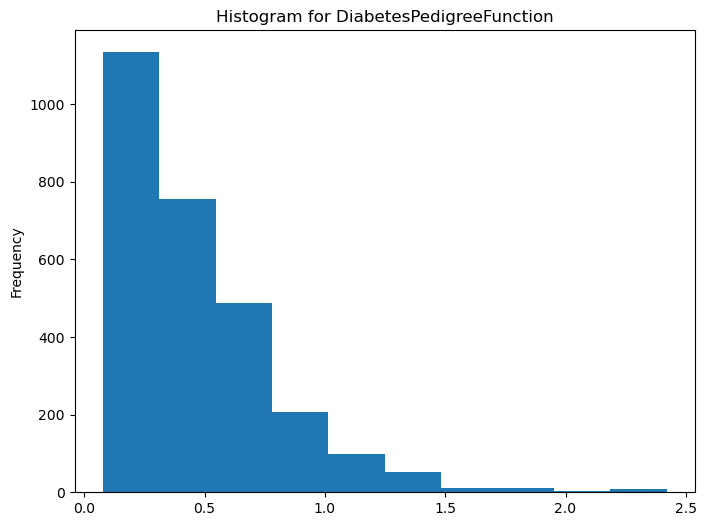

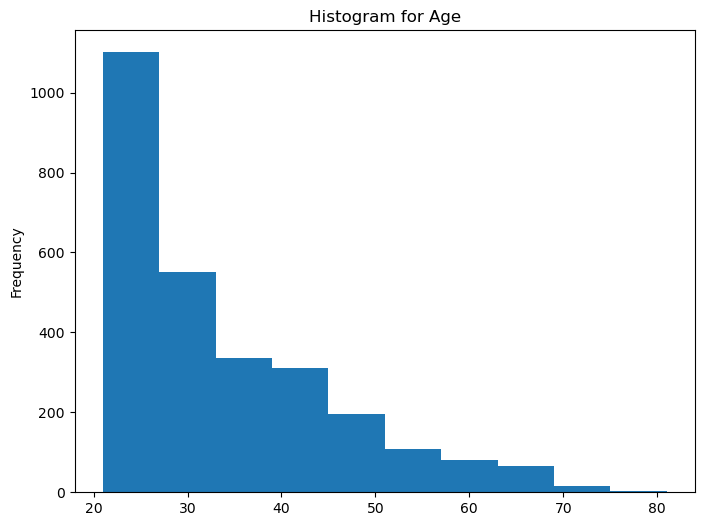

In [13]:
features = ['Glucose','BloodPressure','SkinThickness','Insulin','BMI','DiabetesPedigreeFunction','Age']
# histogram for the features
for feature in features:
    plt.figure(figsize=(8, 6)) 
    df[feature].plot(kind = 'hist')
    plt.title(f'Histogram for {feature}')
    plt.show()

Upon examination of the histogram plots, it is evident that features such as Glucose, BloodPressure, and SkinThickness exhibit a roughly normal distribution. On the other hand, Insulin, BMI, DiabetesPedigreeFunction, and Age display a right-skewed distribution, indicating a concentration of lower values with a tail extending towards higher values.

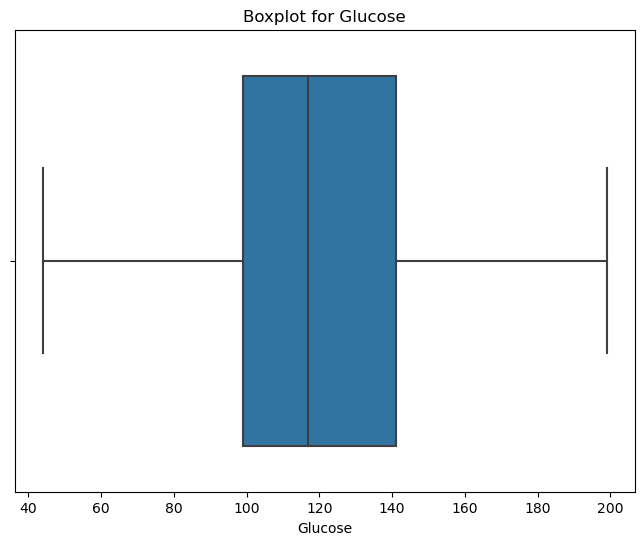

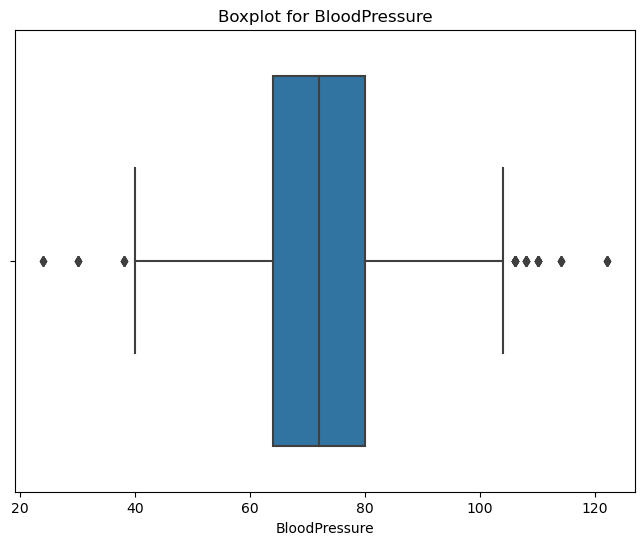

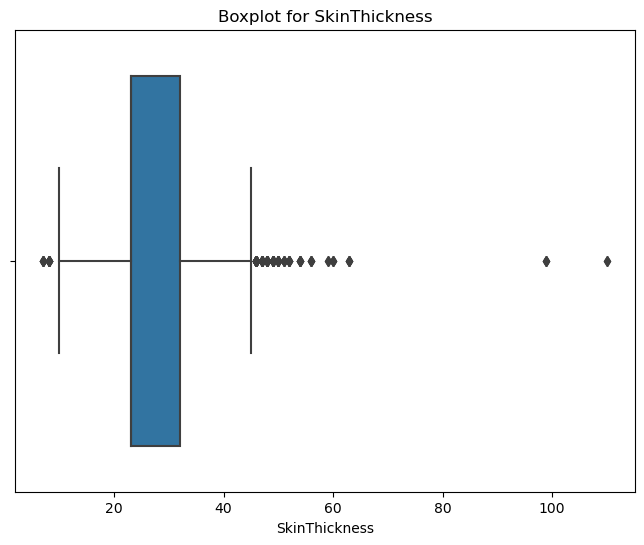

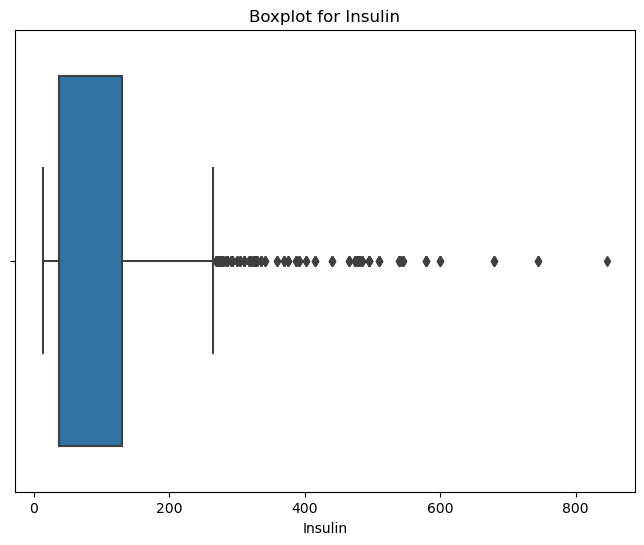

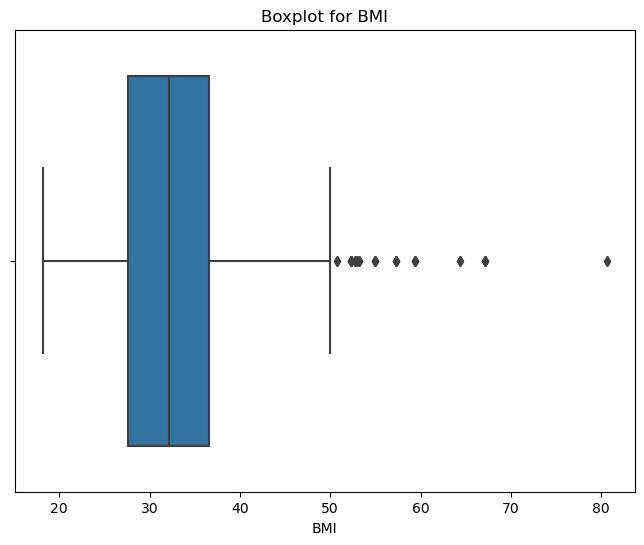

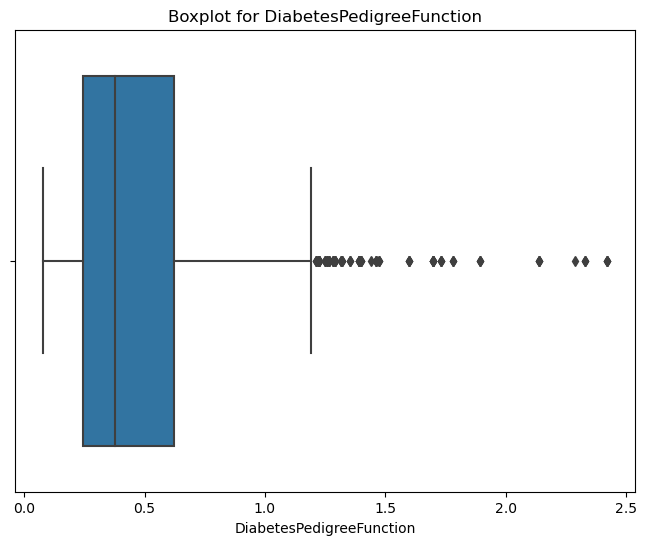

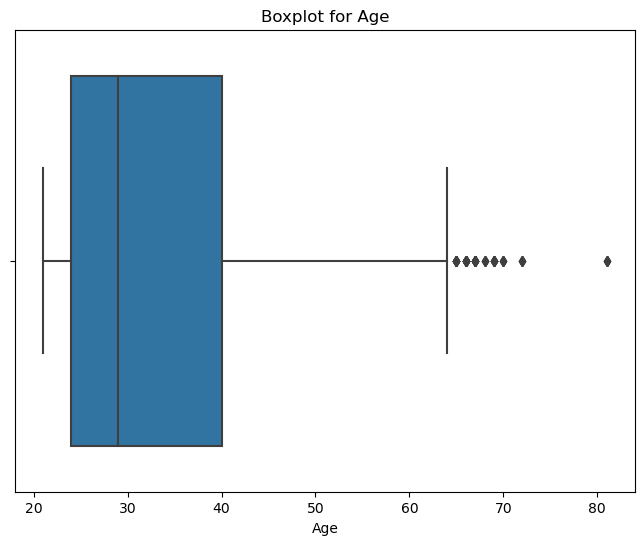

In [14]:
features = ['Glucose','BloodPressure','SkinThickness','Insulin','BMI','DiabetesPedigreeFunction','Age']
# Box plot for the features
for feature in features:
    plt.figure(figsize=(8, 6)) 
    sns.boxplot(x=feature, data=df)
    plt.title(f'Boxplot for {feature}')
    plt.show()

Based on the boxplots, it's evident that the 'Glucose' feature does not exhibit any outliers. Conversely, 'BloodPressure,' 'SkinThickness,' 'Insulin,' 'BMI,' 'DiabetesPedigreeFunction,' and 'Age' features display outliers, signified by values exceeding the average.

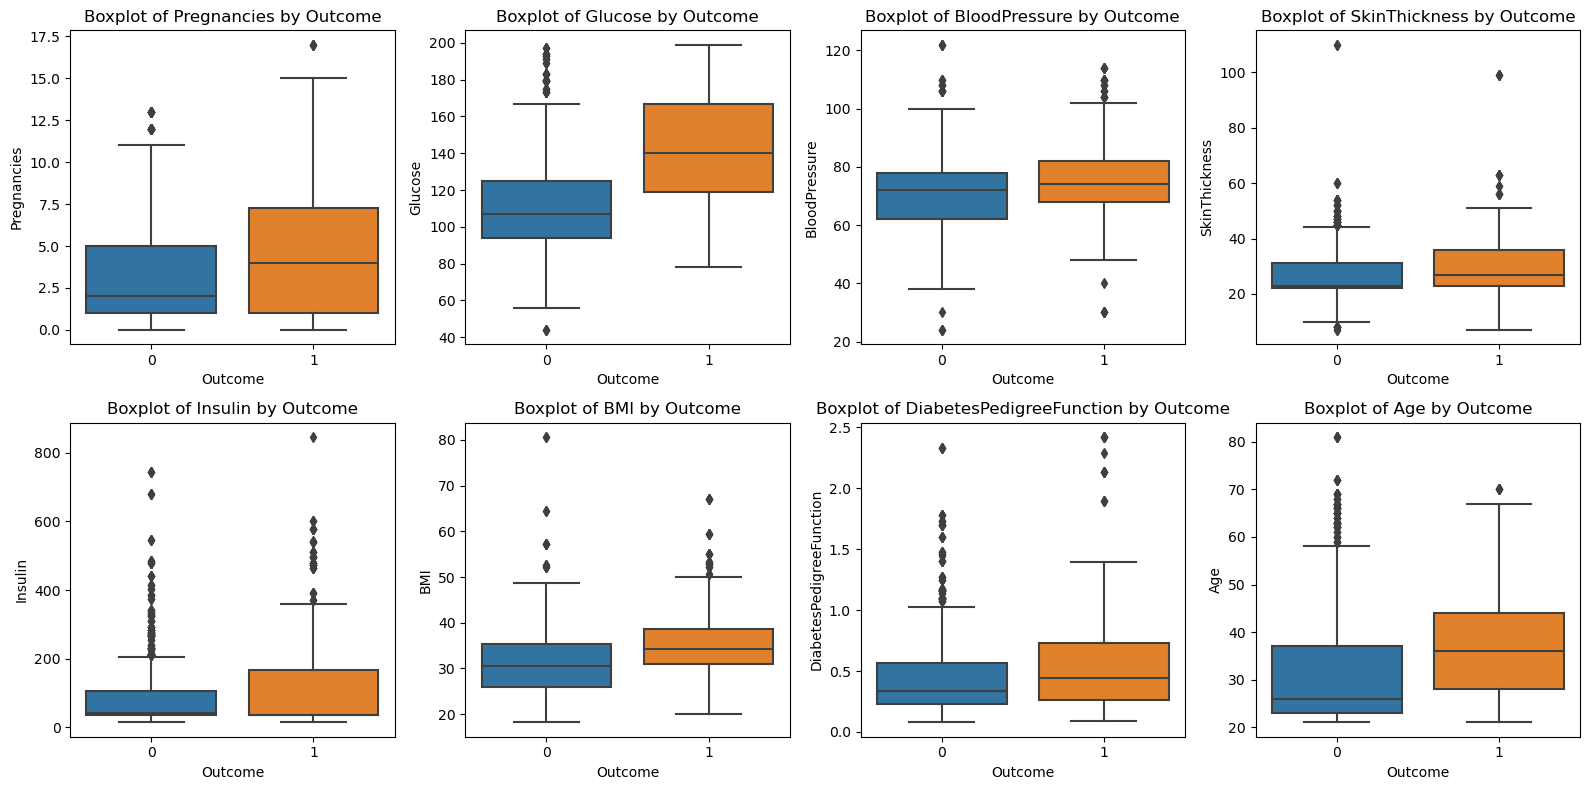

In [15]:
features = ['Pregnancies','Glucose','BloodPressure','SkinThickness','Insulin','BMI','DiabetesPedigreeFunction','Age']

# Set up subplots
fig, axes = plt.subplots(nrows=2, ncols=4, figsize=(16, 8))

# Flatten the axes for easier indexing
axes = axes.flatten()

# Loop through features and create box plots for each feature with respect to 'Outcome'
for i, feature in enumerate(features):
    sns.boxplot(x = 'Outcome', y = feature, data = df, ax = axes[i])
    axes[i].set_title(f'Boxplot of {feature} by Outcome')

# Adjust layout
plt.tight_layout()
plt.show()

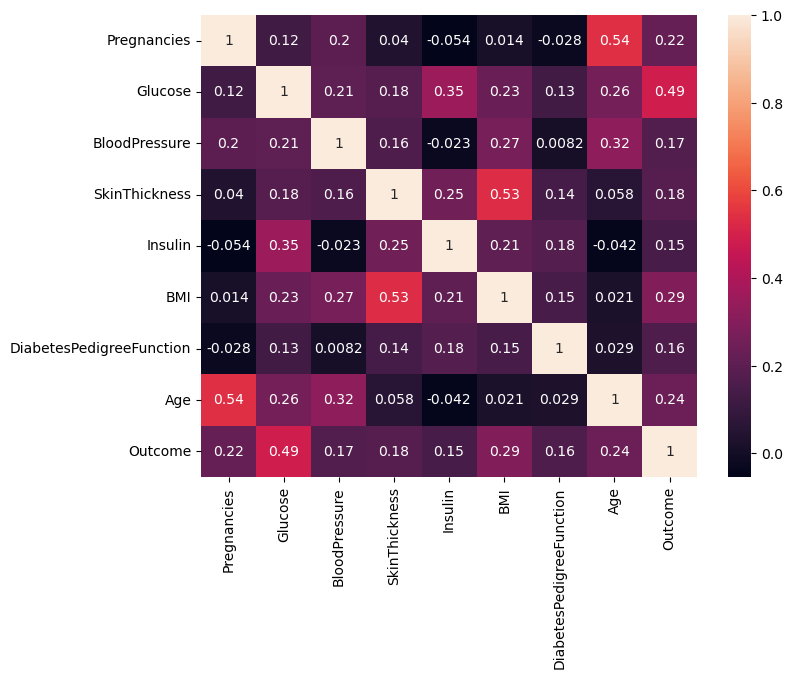

In [16]:
# create heatmap to determine the correlation
plt.figure(figsize=(8,6))
sns.heatmap(df.corr(), annot=True)
plt.show()

Analysis of the plots:
* As the values of Glucose, Insulin, BloodPressure, and BMI surpass the average, individuals are more likely to have diabetes. Notably, the averages for diabetic patients consistently exceed those for non-diabetic patients, with the most significant differences observed in Pregnancies, Glucose, and Insulin.

* Across all features, an upward trend in values corresponds to an increased likelihood of having diabetes. However, in the case of BloodPressure, unusually low values also contribute to an elevated risk of diabetes.

* There is a notable positive correlation between Glucose and Insulin levels. As Glucose levels increase, Insulin levels also tend to rise.

* A substantial difference is observed in the average number of pregnancies between diabetic and non-diabetic patients. On average, individuals with diabetes experience nearly 60% more pregnancies than those without diabetes.

* Pregnancies, Glucose, Insulin, BMI emerge as potentially crucial features for determining the presence of diabetes.

## Feature Selection

In [17]:
# input variables
X = df.drop('Outcome',axis = 1)
# target variable
y = df['Outcome']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 0)

classifier = DecisionTreeClassifier()
classifier.fit(X_train, y_train)

y_test_pred = classifier.predict(X_test)

print(metrics.accuracy_score(y_test, y_test_pred))


0.9981949458483754


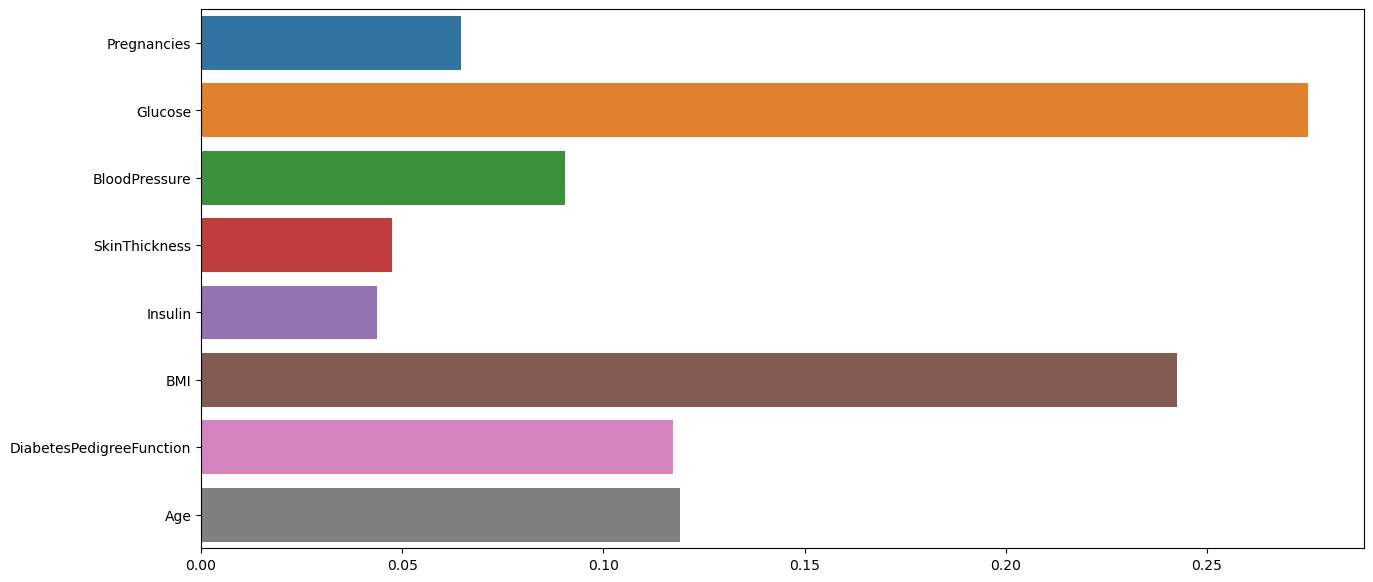

In [18]:
plt.figure(figsize=(15,7))

sns.barplot(x=classifier.feature_importances_, y=X_train.columns)

plt.show()

The visual analysis indicates that all features exhibit some level of influence on the outcome variable, suggesting their importance in identifying the presence of diabetes. Notably, Glucose and BMI stand out as having a particularly significant impact on the target variable, underscoring their potential high relevance in predicting the likelihood of diabetes.

* target variable: Outcome (0 or 1) where 0 - No Diabetes, 1 - Diabetes
* As the target variable is discrete, hence the given task is Classification.
* Input Variables after feature selection: 'Pregnancies','Glucose','BloodPressure','SkinThickness','Insulin','BMI','DiabetesPedigreeFunction','Age'.



In [19]:
# input variables
X = df.drop('Outcome',axis = 1)
# target variable
y = df['Outcome']
# train-test-split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 0)

## Feature Engineering

In [20]:
# Data-preprocessing: Standardizing the train data
scaler = StandardScaler()
X_train_transformed = pd.DataFrame(scaler.fit_transform(X_train),
                                   columns = scaler.get_feature_names_out(), 
                                    index = X_train.index)
print(X_train_transformed.shape)

(2214, 8)


In [21]:
print("Number of Numerical Features:", scaler.n_features_in_)
print("Mean of each column:", scaler.mean_)
print("Std of each column:", np.sqrt(scaler.var_))

Number of Numerical Features: 8
Mean of each column: [  3.69963866 121.40876242  72.35320687  27.28093948  97.9498645
  32.48906956   0.46954381  33.08084914]
Std of each column: [  3.30251743  30.15507248  12.0478531    9.25414665 101.36006778
   7.10099092   0.32272767  11.84647593]


In [22]:
# show the five rows of transformed train data
X_train_transformed.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
330,1.302146,-0.113041,-0.029317,-0.894836,-0.601320,-1.322220,3.118593,1.090548
2594,-0.514649,-0.743118,-1.025345,-1.110955,0.612175,0.578923,-0.051262,-1.019784
1902,-1.120248,-0.942089,-1.025345,-0.462597,-0.601320,0.395850,-0.639994,-0.682131
2635,-0.817449,0.815493,-1.357354,-0.462597,-0.601320,-0.392772,0.292681,-0.344478
1942,1.907745,-0.908927,-0.029317,-1.002895,-0.601320,-1.322220,0.388737,1.934681


In [23]:
# Data-preprocessing: Standardizing the test data
X_test_transformed = pd.DataFrame(scaler.transform(X_test),
                                   columns = scaler.get_feature_names_out(), 
                                    index = X_test.index)
print(X_test_transformed.shape)

(554, 8)


In [24]:
# show the five rows of transformed test data
X_test_transformed.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
2298,-1.120248,0.517035,-0.195322,1.158298,-0.60132,0.100117,-0.928163,-0.935371
817,0.999347,-0.544146,-0.029317,-0.462597,-0.60132,-0.040708,-0.509853,-0.766544
1347,-0.514649,2.506750,-0.195322,7.749938,-0.60132,0.311355,0.326765,2.441161
971,-0.514649,-0.743118,-0.195322,-1.219015,-0.53226,-1.702448,-0.726755,-0.513304
1018,1.604946,-0.510984,-1.689364,-0.462597,-0.60132,-0.181534,-0.277459,0.752895


## Model Training and Testing Phase - Logistic Regression

In [25]:
ls_classifier = LogisticRegression()
ls_classifier.fit(X_train_transformed,y_train)

LogisticRegression()

In [26]:
# evaluation on train data
y_train_pred = ls_classifier.predict(X_train_transformed)
print("train accuracy: ",metrics.accuracy_score(y_train,y_train_pred))

train accuracy:  0.7750677506775068


In [27]:
# evaluation on test data
y_test_pred = ls_classifier.predict(X_test_transformed)
print("test accuracy: ",metrics.accuracy_score(y_test,y_test_pred))

test accuracy:  0.7870036101083032


In [28]:
# confusion matrix
cm = metrics.confusion_matrix(y_test, y_test_pred)

print("Confusion Matrix:")
print(cm)

Confusion Matrix:
[[322  52]
 [ 66 114]]


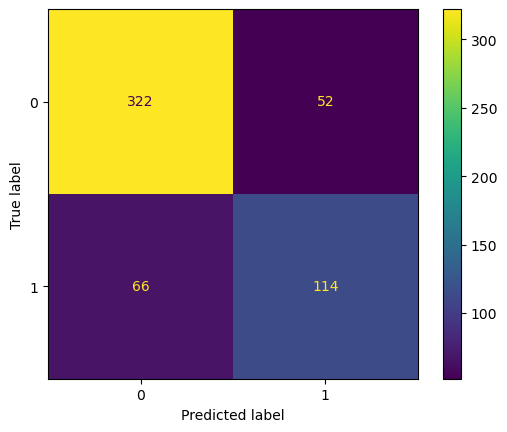

In [29]:
# plot for confusion matrix
fig = metrics.ConfusionMatrixDisplay(cm, display_labels=ls_classifier.classes_)
fig.plot()

In [30]:
# Classification Report
print(metrics.classification_report(y_test, y_test_pred))

              precision    recall  f1-score   support

           0       0.83      0.86      0.85       374
           1       0.69      0.63      0.66       180

    accuracy                           0.79       554
   macro avg       0.76      0.75      0.75       554
weighted avg       0.78      0.79      0.78       554



## Model Training and Testing Phase - KNN Classifier

In [31]:
knn_classifier = KNeighborsClassifier()
knn_classifier.fit(X_train_transformed,y_train)

KNeighborsClassifier()

In [32]:
# evaluation on train data
y_train_pred = knn_classifier.predict(X_train_transformed)
print("train accuracy: ",metrics.accuracy_score(y_train,y_train_pred))

train accuracy:  0.947606142728094


In [33]:
# evaluation on test data
y_test_pred = knn_classifier.predict(X_test_transformed)
print("test accuracy: ",metrics.accuracy_score(y_test,y_test_pred))

test accuracy:  0.8393501805054152


In [34]:
# confusion matrix
cm = metrics.confusion_matrix(y_test, y_test_pred)

print("Confusion Matrix:")
print(cm)

Confusion Matrix:
[[324  50]
 [ 39 141]]


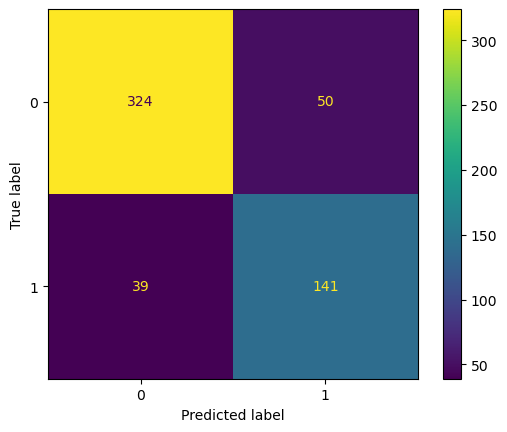

In [35]:
# plot for confusion matrix
fig = metrics.ConfusionMatrixDisplay(cm, display_labels=knn_classifier.classes_)
fig.plot()

In [36]:
# Classification Report
print(metrics.classification_report(y_test, y_test_pred))

              precision    recall  f1-score   support

           0       0.89      0.87      0.88       374
           1       0.74      0.78      0.76       180

    accuracy                           0.84       554
   macro avg       0.82      0.82      0.82       554
weighted avg       0.84      0.84      0.84       554



## Model Training and Testing Phase - Decision Tree Classifier

In [37]:
dt_classifier = DecisionTreeClassifier()
dt_classifier.fit(X_train_transformed,y_train)

DecisionTreeClassifier()

In [38]:
# evaluation on train data
y_train_pred = dt_classifier.predict(X_train_transformed)
print("train accuracy: ",metrics.accuracy_score(y_train,y_train_pred))

train accuracy:  1.0


In [39]:
# evaluation on test data
y_test_pred = dt_classifier.predict(X_test_transformed)
print("test accuracy: ",metrics.accuracy_score(y_test,y_test_pred))

test accuracy:  0.9963898916967509


In [40]:
# confusion matrix
cm = metrics.confusion_matrix(y_test, y_test_pred)

print("Confusion Matrix:")
print(cm)

Confusion Matrix:
[[374   0]
 [  2 178]]


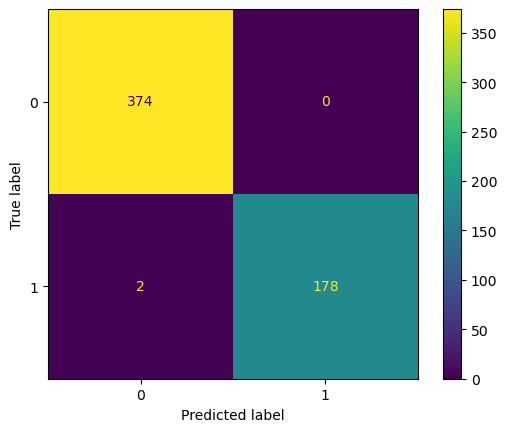

In [41]:
# plot for confusion matrix
fig = metrics.ConfusionMatrixDisplay(cm, display_labels=dt_classifier.classes_)
fig.plot()

In [42]:
# Classification Report
print(metrics.classification_report(y_test, y_test_pred))

              precision    recall  f1-score   support

           0       0.99      1.00      1.00       374
           1       1.00      0.99      0.99       180

    accuracy                           1.00       554
   macro avg       1.00      0.99      1.00       554
weighted avg       1.00      1.00      1.00       554



## Model Training and Testing Phase - Random Forest Classifier

In [43]:
rf_classifier = RandomForestClassifier()
rf_classifier.fit(X_train_transformed,y_train)

RandomForestClassifier()

In [44]:
# evaluation on train data
y_train_pred = rf_classifier.predict(X_train_transformed)
print("train accuracy: ",metrics.accuracy_score(y_train,y_train_pred))

train accuracy:  1.0


In [45]:
# evaluation on test data
y_test_pred = rf_classifier.predict(X_test_transformed)
print("test accuracy: ",metrics.accuracy_score(y_test,y_test_pred))

test accuracy:  0.9891696750902527


In [46]:
# confusion matrix
cm = metrics.confusion_matrix(y_test, y_test_pred)

print("Confusion Matrix:")
print(cm)

Confusion Matrix:
[[370   4]
 [  2 178]]


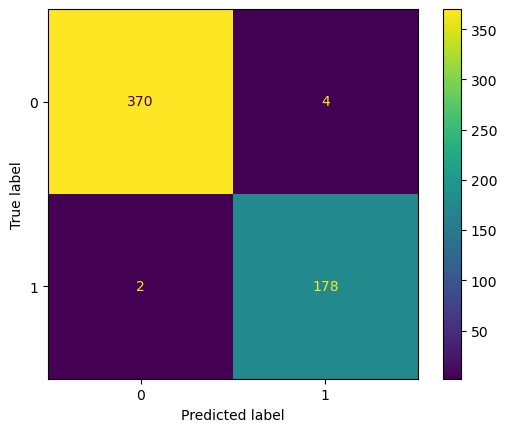

In [47]:
# plot for confusion matrix
fig = metrics.ConfusionMatrixDisplay(cm, display_labels=rf_classifier.classes_)
fig.plot()

In [48]:
# Classification Report
print(metrics.classification_report(y_test, y_test_pred))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99       374
           1       0.98      0.99      0.98       180

    accuracy                           0.99       554
   macro avg       0.99      0.99      0.99       554
weighted avg       0.99      0.99      0.99       554



## Model Training and Testing Phase - SVM Classifier

In [49]:
svm_classifier = SVC()
svm_classifier.fit(X_train_transformed,y_train)

SVC()

In [50]:
# evaluation on train data
y_train_pred = svm_classifier.predict(X_train_transformed)
print("train accuracy: ",metrics.accuracy_score(y_train,y_train_pred))

train accuracy:  0.8586269196025293


In [51]:
# evaluation on test data
y_test_pred = svm_classifier.predict(X_test_transformed)
print("test accuracy: ",metrics.accuracy_score(y_test,y_test_pred))

test accuracy:  0.8592057761732852


In [52]:
# confusion matrix
cm = metrics.confusion_matrix(y_test, y_test_pred)

print("Confusion Matrix:")
print(cm)

Confusion Matrix:
[[340  34]
 [ 44 136]]


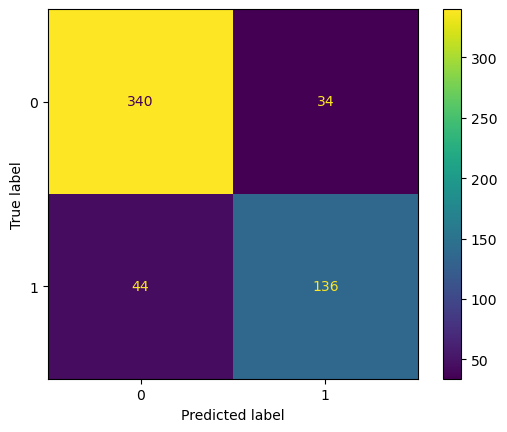

In [53]:
# plot for confusion matrix
fig = metrics.ConfusionMatrixDisplay(cm, display_labels=svm_classifier.classes_)
fig.plot()

In [54]:
# Classification Report
print(metrics.classification_report(y_test, y_test_pred))

              precision    recall  f1-score   support

           0       0.89      0.91      0.90       374
           1       0.80      0.76      0.78       180

    accuracy                           0.86       554
   macro avg       0.84      0.83      0.84       554
weighted avg       0.86      0.86      0.86       554



## Conclusion

* After building and evaluating various classifiers, it is evident that the decision tree (DT) classifier emerges as the most promising model for this particular task of predicting the diabetes. 

* The model exhibits a well-balanced performance with similar accuracies on both the training and test datasets, indicating a lack of overfitting or underfitting issues. 

* The DT model achieves the highest accuracy overall and demonstrates superior predictive capabilities, as evidenced by its confusion matrix.

* This matrix reveals that the DT model successfully classified a substantial number of predictions correctly, outperforming other classifiers like logistic regression, k-nearest neighbors (KNN), random forest, and support vector machine (SVM). 

* Specifically, logistic regression showed lower accuracy, KNN exhibited signs of overfitting, random forest, while having good accuracy, fell short of the decision tree model in correctly predicting instances. SVM, despite its utility, achieved lower accuracy compared to the decision tree.

* Hence, the decision tree classifier stands out as the most effective model in terms of accuracy, generalization to unseen data, and precision in predicting the presence of diabetes.